<a href="https://colab.research.google.com/github/sutanmuleta/Custom-vs.-Fine-Tuned-Computer-Vision-Models-A-Comparative-Analysis/blob/main/custom7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple custom model
custom_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
custom_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.4219 - loss: 1.6166 - val_accuracy: 0.5774 - val_loss: 1.1976
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - accuracy: 0.5940 - loss: 1.1559 - val_accuracy: 0.5996 - val_loss: 1.1357
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.6408 - loss: 1.0237 - val_accuracy: 0.6034 - val_loss: 1.1131
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.6760 - loss: 0.9244 - val_accuracy: 0.6071 - val_loss: 1.1335
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.7023 - loss: 0.8482 - val_accuracy: 0.6326 - val_loss: 1.0628
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.7225 - loss: 0.7892 - val_accuracy: 0.6497 - val_loss: 1.0239
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.7452 - loss: 0.7282 - val_accuracy: 0.6415 - val_loss: 1.0548
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7664 -

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load the VGG16 model with pre-trained weights, excluding the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Define the full model
fine_tuned_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
fine_tuned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
fine_tuned_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 706s 451ms/step - accuracy: 0.4642 - loss: 1.5376 - val_accuracy: 0.5556 - val_loss: 1.2674
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 740s 449ms/step - accuracy: 0.5848 - loss: 1.1917 - val_accuracy: 0.5842 - val_loss: 1.1942
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 670s 429ms/step - accuracy: 0.6054 - loss: 1.1311 - val_accuracy: 0.5901 - val_loss: 1.1799
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 663s 417ms/step - accuracy: 0.6224 - loss: 1.0832 - val_accuracy: 0.5985 - val_loss: 1.1531
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 687s 440ms/step - accuracy: 0.6287 - loss: 1.0557 - val_accuracy: 0.6056 - val_loss: 1.1322
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 720s 426ms/step - accuracy: 0.6404 - loss: 1.0262 - val_accuracy: 0.6066 - val_loss: 1.1225
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 667s 427ms/step - accuracy: 0.6490 - loss: 0.9980 - val_accuracy: 0.6091 - val_loss: 1.1241
Epoch 8/10


In [ ]:
# Evaluate custom model
custom_model.evaluate(x_test, y_test)

# Evaluate fine-tuned model
fine_tuned_model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6468 - loss: 1.1015
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 361ms/step - accuracy: 0.6118 - loss: 1.1092


[1.123045563697815, 0.6111999750137329]

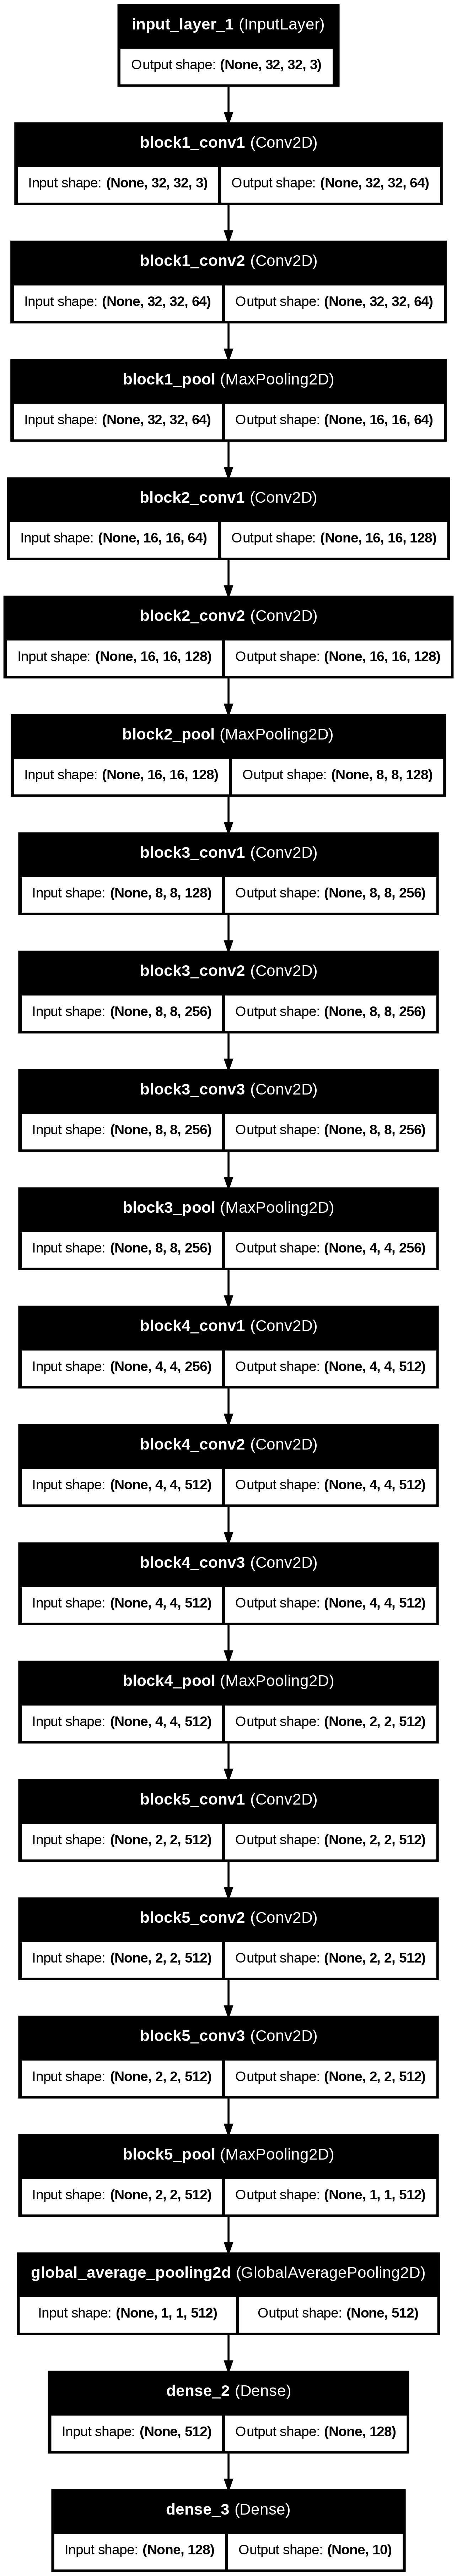

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the Custom CNN model
plot_model(custom_model, to_file='custom_cnn_model.png', show_shapes=True, show_layer_names=True)

# Plot the Fine-Tuned VGG16 model
plot_model(fine_tuned_model, to_file='fine_tuned_vgg16_model.png', show_shapes=True, show_layer_names=True)
